In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet

In [ ]:

sales=pd.read_csv("/content/Pizza_Sale - pizza_sales.csv")
ingredients=pd.read_csv("/content/Pizza_ingredients - Pizza_ingredients.csv")
sales.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
sales.isna().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,7
pizza_size,0
pizza_category,23


In [ ]:
sales[sales['pizza_category'].isna()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
426,427,181,mexicana_l,1,3/1/2015,18:49:32,20.25,20.25,L,NaN,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
427,428,182,brie_carre_s,1,3/1/2015,18:50:10,23.65,23.65,S,NaN,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",The Brie Carre Pizza
428,429,182,peppr_salami_l,1,3/1/2015,18:50:10,20.75,20.75,L,NaN,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza
429,430,183,napolitana_m,1,3/1/2015,18:54:55,16.00,16.00,M,NaN,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
430,431,183,spin_pesto_l,1,3/1/2015,18:54:55,20.75,20.75,L,NaN,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat...",The Spinach Pesto Pizza
431,432,183,spin_pesto_s,1,3/1/2015,18:54:55,12.50,12.50,S,NaN,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat...",The Spinach Pesto Pizza
432,433,184,hawaiian_l,1,3/1/2015,18:59:05,16.50,16.50,L,NaN,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
433,434,185,sicilian_m,1,3/1/2015,19:08:33,16.25,16.25,M,NaN,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
434,435,185,spin_pesto_s,1,3/1/2015,19:08:33,12.50,12.50,S,NaN,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat...",The Spinach Pesto Pizza
435,436,186,mexicana_l,1,3/1/2015,19:36:00,20.25,20.25,L,NaN,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
sales['total_price'].fillna(sales['unit_price'] * sales['quantity'], inplace=True)

<ipython-input-53-4f67e96b5589>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales['total_price'].fillna(sales['unit_price'] * sales['quantity'], inplace=True)


In [ ]:
sales['pizza_name_id'].value_counts()

,count
pizza_name_id,
big_meat_s,1811
thai_ckn_l,1363
five_cheese_l,1358
four_cheese_l,1272
classic_dlx_m,1159
...,...
mexicana_s,160
calabrese_s,99
ckn_alfredo_s,96


In [ ]:
sales['pizza_category'].value_counts()

,count
pizza_category,
Classic,14572
Supreme,11771
Veggie,11442
Chicken,10812


In [ ]:
sales['pizza_name'].value_counts()

,count
pizza_name,
The Classic Deluxe Pizza,2416
The Barbecue Chicken Pizza,2372
The Hawaiian Pizza,2369
The Pepperoni Pizza,2367
The Thai Chicken Pizza,2315
The California Chicken Pizza,2302
The Sicilian Pizza,1886
The Spicy Italian Pizza,1886
The Southwest Chicken Pizza,1885


In [ ]:
sales['pizza_ingredients'].value_counts()

,count
pizza_ingredients,
"Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon",2416
"Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce",2372
"Sliced Ham, Pineapple, Mozzarella Cheese",2369
"Mozzarella Cheese, Pepperoni",2369
"Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce",2315
"Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese",2300
"Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic",1887
"Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic",1887
"Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce",1884


In [ ]:
name_id_mapping = sales[['pizza_name', 'pizza_name_id']].dropna().drop_duplicates()
name_id_mapping = name_id_mapping.set_index('pizza_name')['pizza_name_id'].to_dict()

sales['pizza_name_id'] = sales['pizza_name_id'].fillna(sales['pizza_name'].map(name_id_mapping))

In [ ]:
category_mapping = sales[['pizza_name_id', 'pizza_category']].dropna().drop_duplicates()
category_mapping = category_mapping.set_index('pizza_name_id')['pizza_category'].to_dict()

sales['pizza_category'] = sales['pizza_category'].fillna(sales['pizza_name_id'].map(category_mapping))

In [ ]:
ingredients_mapping = sales[['pizza_name', 'pizza_ingredients']].dropna().drop_duplicates()
ingredients_mapping = ingredients_mapping.set_index('pizza_name')['pizza_ingredients'].to_dict()

sales['pizza_ingredients'] = sales['pizza_ingredients'].fillna(sales['pizza_name'].map(ingredients_mapping))

In [ ]:
ingredients_name_mapping = sales[['pizza_ingredients', 'pizza_name']].dropna().drop_duplicates()
ingredients_name_mapping = ingredients_name_mapping.set_index('pizza_ingredients')['pizza_name'].to_dict()

sales['pizza_name'] = sales['pizza_name'].fillna(sales['pizza_ingredients'].map(ingredients_name_mapping))

In [ ]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [ ]:
ingredients.isna().sum()

,0
pizza_name_id,0
pizza_name,0
pizza_ingredients,0
Items_Qty_In_Grams,4


In [ ]:
ingredients[ingredients['Items_Qty_In_Grams'].isna()]

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,NaN
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN


In [ ]:
# Update the Items_Qty_In_Grams column only for 'Sliced Ham' and specific pizza_name_id values
ingredients.loc[
    (ingredients['pizza_ingredients'] == 'Sliced Ham') &
    (ingredients['pizza_name_id'] == 'hawaiian_l'),
    'Items_Qty_In_Grams'
] = 30

ingredients.loc[
    (ingredients['pizza_ingredients'] == 'Sliced Ham') &
    (ingredients['pizza_name_id'] == 'hawaiian_m'),
    'Items_Qty_In_Grams'
] = 15

ingredients.loc[
    (ingredients['pizza_ingredients'] == 'Sliced Ham') &
    (ingredients['pizza_name_id'] == 'hawaiian_s'),
    'Items_Qty_In_Grams'
] = 7.5




In [ ]:
ingredients.loc[
    (ingredients['pizza_ingredients'] == 'Caramelized Onions') &
    (ingredients['pizza_name_id'] == 'brie_carre_s'),
    'Items_Qty_In_Grams'
] = 10

In [ ]:
sales['order_time'] = pd.to_datetime(sales['order_time'], format='%H:%M:%S').dt.time
def extract_date(date):
    formats = ['%d-%m-%Y', '%d/%m/%Y', '%m/%d/%Y']
    for fmt in formats:
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return pd.NaT

# Applying the function to the 'order_date' column
sales['order_date'] = sales['order_date'].apply(extract_date)


In [ ]:
sales['day_of_week'] = sales['order_date'].dt.dayofweek
sales['month'] = sales['order_date'].dt.month
sales['week'] = sales['order_date'].dt.isocalendar().week
sales['year'] = sales['order_date'].dt.year

In [ ]:
# Drop duplicate rows (based on all columns)
sales = sales.drop_duplicates()

# OR: Drop duplicates based on specific columns (e.g., 'order_id' and 'pizza_name_id')
sales = sales.drop_duplicates(subset=['order_id', 'pizza_name_id'])

# Reset the index after dropping duplicates
sales.reset_index(drop=True, inplace=True)



In [ ]:
sales.shape

(48620, 16)

In [ ]:
sales.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,month,week,year
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,3,1,1,2015
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,3,1,1,2015
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,3,1,1,2015
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,3,1,1,2015
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3,1,1,2015


#EDA

<ipython-input-73-da6af6e6c0ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_quantity.index, y=day_quantity.values, palette='viridis')


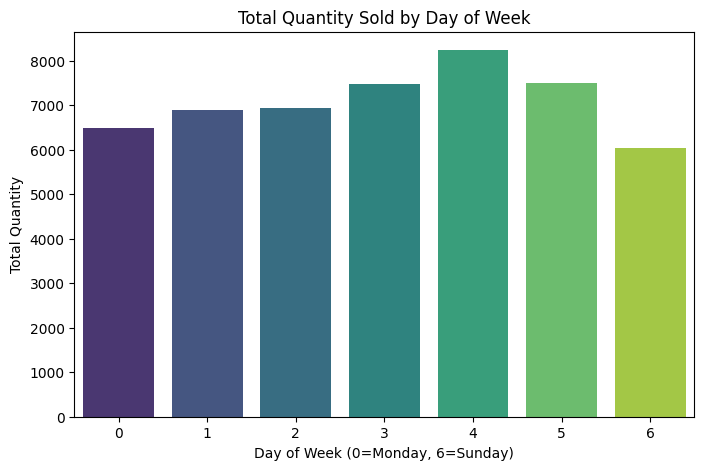

In [ ]:
day_quantity = sales.groupby('day_of_week')['quantity'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=day_quantity.index, y=day_quantity.values, palette='viridis')
plt.title('Total Quantity Sold by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Quantity')
plt.show()

<ipython-input-51-3b337a89b2db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_quantity.index, y=category_quantity.values, palette='magma')


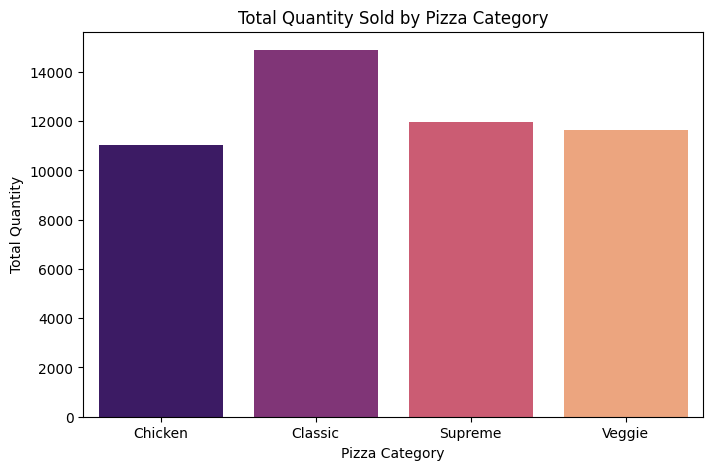

In [ ]:
category_quantity = sales.groupby('pizza_category')['quantity'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=category_quantity.index, y=category_quantity.values, palette='magma')
plt.title('Total Quantity Sold by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Quantity')
plt.show()

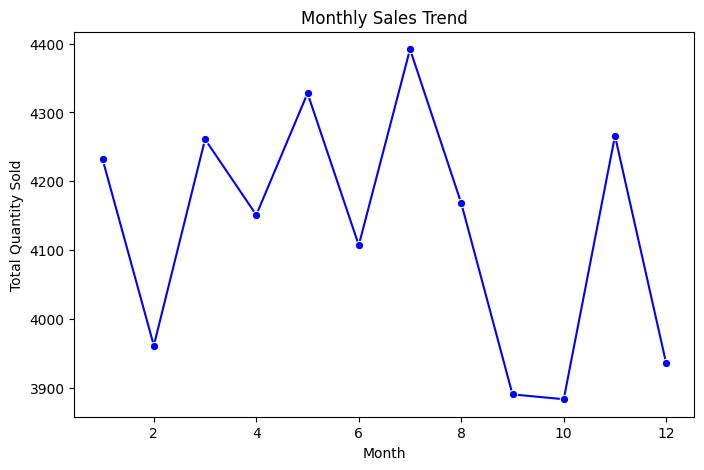

In [ ]:
monthly_sales = sales.groupby('month')['quantity'].sum()
plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

<ipython-input-53-1367b5b77b34>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pizzas.values, y=top_pizzas.index, palette='coolwarm')


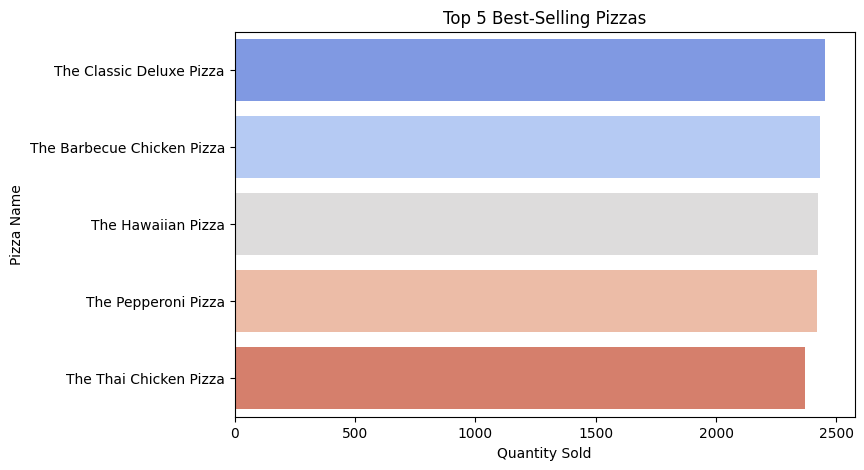

In [ ]:
top_pizzas = sales.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_pizzas.values, y=top_pizzas.index, palette='coolwarm')
plt.title('Top 5 Best-Selling Pizzas')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()

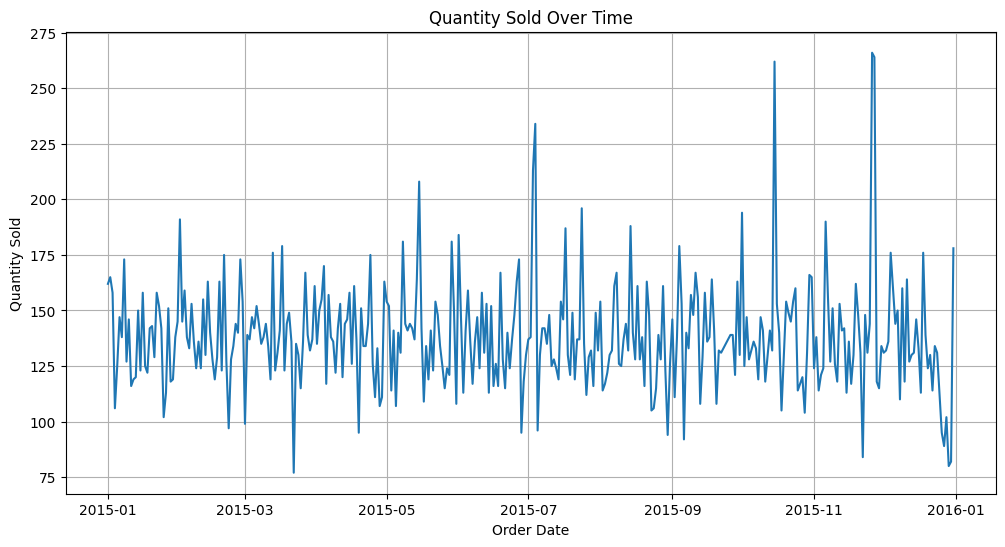

In [ ]:
# Group by order date and sum the quantity
quantity_over_time = sales.groupby('order_date')['quantity'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(quantity_over_time.index, quantity_over_time.values)
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold Over Time')
plt.grid(True)
plt.show()


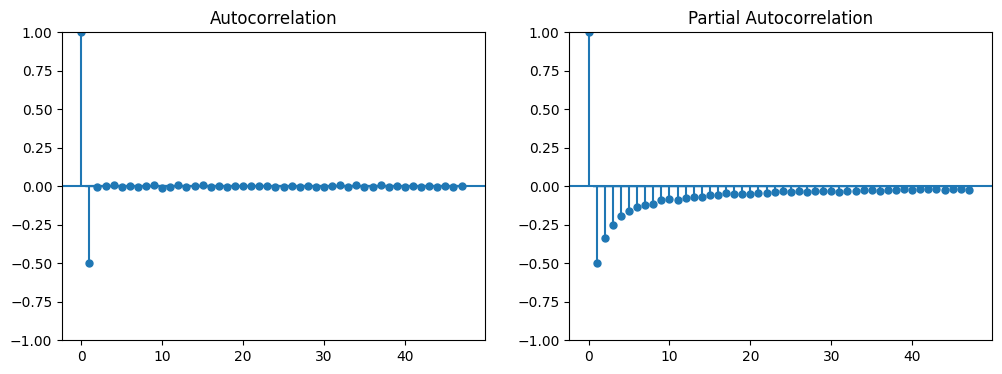

In [ ]:
time_series = sales.set_index('order_date')['quantity']


# Differencing
differenced_series = time_series.diff().dropna()


# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

In [ ]:
#Null Hypothesis: Data is non-stationary
#Alternative Hypothesis: Data is stationary
def adfuller_test(y):
    adf_result = adfuller(y)

    print("ADF Statistic:", adf_result[0])
    print("P-Value:", adf_result[1])

adfuller_test(sales.quantity)

ADF Statistic: -54.18505490216881
P-Value: 0.0


#sales

In [ ]:
sales_pre = sales.groupby(['order_date', 'pizza_name'])['quantity'].sum().unstack().fillna(0)
sales_pre.head()

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
order_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11.0,5.0,0.0,1.0,4.0,2.0,4.0,10.0,7.0,6.0,...,4.0,4.0,1.0,7.0,5.0,2.0,5.0,2.0,8.0,3.0
2015-01-02,9.0,8.0,0.0,0.0,5.0,1.0,2.0,6.0,6.0,3.0,...,4.0,6.0,4.0,6.0,11.0,2.0,8.0,4.0,9.0,5.0
2015-01-03,7.0,8.0,1.0,1.0,12.0,5.0,3.0,5.0,4.0,7.0,...,7.0,7.0,1.0,5.0,4.0,6.0,2.0,2.0,10.0,7.0
2015-01-04,11.0,0.0,2.0,2.0,5.0,5.0,1.0,4.0,4.0,4.0,...,5.0,3.0,0.0,1.0,6.0,3.0,4.0,4.0,5.0,1.0
2015-01-05,2.0,4.0,2.0,0.0,8.0,9.0,2.0,9.0,6.0,5.0,...,3.0,6.0,2.0,4.0,3.0,4.0,2.0,3.0,6.0,2.0


In [ ]:
pizza = sales_pre['The Barbecue Chicken Pizza']

In [ ]:
# Train-Test Split
train = pizza[:-7]  # Use all but the last 7 days for training
test = pizza[-7:]

In [ ]:
train.index = pd.to_datetime(train.index)
train = train.asfreq('D')

In [ ]:
arima_model = ARIMA(train, order=(1, 0, 1))
arima_result = arima_model.fit()

# Forecast
arima_forecast = arima_result.forecast(steps=len(test))

# Evaluate ARIMA Model
arima_mape = mean_absolute_percentage_error(test, arima_forecast)

print("ARIMA Model MAPE:", arima_mape)


ARIMA Model MAPE: 0.7817242135011078


In [ ]:
sarima_model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 7))
sarima_result = sarima_model.fit()

# Forecast
sarima_forecast = sarima_result.forecast(steps=len(test))

# Evaluate SARIMA Model
sarima_mape = mean_absolute_percentage_error(test, sarima_forecast)

print("SARIMA Model MAPE:", sarima_mape)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA Model MAPE: 0.7567357276463345


In [ ]:
prophet_data = pizza.reset_index()
prophet_data.columns = ['ds', 'y']# Rename columns for Prophet (ds: datetime, y: target value)

# Train-Test Split
prophet_train = prophet_data[:-7]
prophet_test = prophet_data[-7:]

# Fit Prophet Model
prophet_model = Prophet()
prophet_model.fit(prophet_train)

# Forecast
future_dates = prophet_model.make_future_dataframe(periods=7)
prophet_forecast = prophet_model.predict(future_dates)

# Extract only test period forecast
prophet_test_forecast = prophet_forecast[-7:]['yhat']

# Evaluate Prophet Model
prophet_mape = mean_absolute_percentage_error(prophet_test['y'], prophet_test_forecast)

print("Prophet Model MAPE:", prophet_mape)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6rlt83po/em9rijl9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6rlt83po/lnb_rb4r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29803', 'data', 'file=/tmp/tmp6rlt83po/em9rijl9.json', 'init=/tmp/tmp6rlt83po/lnb_rb4r.json', 'output', 'file=/tmp/tmp6rlt83po/prophet_modellvmnhbwx/prophet_model-20241207133519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:35:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:35:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Model MAPE: 0.698491507412836


In [ ]:
all_forecasts = {}

# Loop through each pizza type
for pizza in sales_pre.columns:  # data contains daily sales of each pizza
    one_pizza_sales = sales_pre[pizza].reset_index()
    one_pizza_sales.columns = ['ds', 'y']  # Prophet requires columns ['ds', 'y']

    # Create a new Prophet instance for each pizza
    prophet_model = Prophet()
    prophet_model.fit(one_pizza_sales)

    # Forecast for the next 7 days
    future_dates = prophet_model.make_future_dataframe(periods=7)
    forecast = prophet_model.predict(future_dates)

    # Store forecasted values (last 7 days)
    all_forecasts[pizza] = forecast.iloc[-7:]['yhat'].values

# Convert forecasts into a DataFrame
forecast_df = pd.DataFrame(all_forecasts)
forecast_df.index = pd.date_range(start=sales_pre.index[-1] + pd.Timedelta(days=1), periods=7)

forecast_df


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6rlt83po/pczsm459.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6rlt83po/fnt6tkom.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85396', 'data', 'file=/tmp/tmp6rlt83po/pczsm459.json', 'init=/tmp/tmp6rlt83po/fnt6tkom.json', 'output', 'file=/tmp/tmp6rlt83po/prophet_modelayk14t2e/prophet_model-20241207133616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:36:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:36:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
2016-01-01,7.554193,6.314400,1.458350,2.739594,8.033202,3.060590,3.610364,8.714867,4.887471,5.740395,...,4.928852,6.387765,2.949198,6.513684,6.525588,3.533824,3.184446,4.628676,8.046245,4.732443
2016-01-02,6.858459,6.029338,1.230119,2.904504,6.878469,3.270876,2.786450,7.538966,3.540779,5.131997,...,4.148948,5.930667,2.662050,5.247355,5.447556,3.168694,2.636770,3.736324,7.489634,4.453378
2016-01-03,5.277718,5.175372,1.576334,2.366492,5.705261,2.232683,2.460373,5.826872,2.732928,4.014222,...,3.573870,4.623663,2.085139,4.497819,4.080439,2.476249,2.021340,3.447782,5.720334,3.031666
2016-01-04,6.728936,5.471093,1.434904,2.809357,6.802452,3.082704,2.662025,7.357560,3.246408,4.627108,...,3.708361,4.756614,2.407069,5.989622,5.359956,2.699237,2.487818,3.638828,7.040692,3.769958
2016-01-05,5.672759,5.231986,1.345706,2.539449,6.531909,2.425070,2.442241,7.231371,3.598449,4.939381,...,4.168540,5.238705,3.142686,5.305123,5.563286,2.784150,2.117404,3.774627,6.508661,3.763395
2016-01-06,5.792137,5.269779,1.345775,2.731612,6.262545,2.809667,2.807825,7.154488,3.213752,5.864504,...,3.938593,5.411685,2.508086,5.516574,5.043442,2.534139,2.559668,3.928432,6.681668,3.879378
2016-01-07,6.634721,5.428100,1.461892,3.061397,6.958633,2.733319,2.673367,7.745391,3.510753,5.879863,...,3.860633,5.854882,2.544869,5.694189,5.814783,2.575497,2.382115,3.808441,7.036242,4.524034


In [ ]:
# Round the forecasted number of pizzas to the nearest whole number
forecast_df = forecast_df.round()

# Display the updated forecast DataFrame
forecast_df

,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
2016-01-01,8.0,6.0,1.0,3.0,8.0,3.0,4.0,9.0,5.0,6.0,...,5.0,6.0,3.0,7.0,7.0,4.0,3.0,5.0,8.0,5.0
2016-01-02,7.0,6.0,1.0,3.0,7.0,3.0,3.0,8.0,4.0,5.0,...,4.0,6.0,3.0,5.0,5.0,3.0,3.0,4.0,7.0,4.0
2016-01-03,5.0,5.0,2.0,2.0,6.0,2.0,2.0,6.0,3.0,4.0,...,4.0,5.0,2.0,4.0,4.0,2.0,2.0,3.0,6.0,3.0
2016-01-04,7.0,5.0,1.0,3.0,7.0,3.0,3.0,7.0,3.0,5.0,...,4.0,5.0,2.0,6.0,5.0,3.0,2.0,4.0,7.0,4.0
2016-01-05,6.0,5.0,1.0,3.0,7.0,2.0,2.0,7.0,4.0,5.0,...,4.0,5.0,3.0,5.0,6.0,3.0,2.0,4.0,7.0,4.0
2016-01-06,6.0,5.0,1.0,3.0,6.0,3.0,3.0,7.0,3.0,6.0,...,4.0,5.0,3.0,6.0,5.0,3.0,3.0,4.0,7.0,4.0
2016-01-07,7.0,5.0,1.0,3.0,7.0,3.0,3.0,8.0,4.0,6.0,...,4.0,6.0,3.0,6.0,6.0,3.0,2.0,4.0,7.0,5.0


In [ ]:
ingredient_forecast = []

# Loop through each pizza in forecast_df
for pizza in forecast_df.columns:
    # Get the total forecasted sales for the pizza (sum across 7 days)
    total_sales = forecast_df[pizza].sum()

    # Get the ingredient requirements for the pizza from ingredients_data
    pizza_ingredients = ingredients[ingredients['pizza_name'] == pizza]

    # Calculate total ingredient requirements
    for _, row in pizza_ingredients.iterrows():
        ingredient_forecast.append({
            'ingredient': row['pizza_ingredients'],  # Ingredient name
            'quantity_needed': total_sales * row['Items_Qty_In_Grams']  # Forecast * quantity per pizza
        })

# Convert to DataFrame
ingredient_forecast_df = pd.DataFrame(ingredient_forecast)

# Summarize by ingredient
final_purchase_order = ingredient_forecast_df.groupby('ingredient').agg({'quantity_needed': 'sum'}).reset_index()

# Add a unit column (e.g., grams)
final_purchase_order['unit'] = 'grams'

# Display the final purchase order
print("Final Purchase Order:")
pd.set_option('display.max_rows',64)
final_purchase_order

Final Purchase Order:


,ingredient,quantity_needed,unit
0,?duja Salami,2400.0,grams
1,Alfredo Sauce,855.0,grams
2,Anchovies,2465.0,grams
3,Artichokes,7245.0,grams
4,Arugula,870.0,grams
5,Asiago Cheese,3960.0,grams
6,Bacon,19590.0,grams
7,Barbecue Sauce,1380.0,grams
8,Barbecued Chicken,4140.0,grams
9,Beef Chuck Roast,15960.0,grams
